# Análise de acidentes em rodovias federais entre 2017-2021
01 de fevereiro,2022

## 1. Descrição do problema

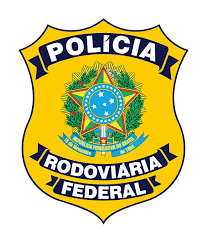
A Polícia Rodoviária Federal (PRF) é uma instituição policial ostensiva federal brasileira, subordinada ao Ministério da Justiça e Segurança Pública, cuja principal função é garantir a segurança com cidadania nas rodovias federais e em áreas de interesse da União. Assim, combate as mais variadas formas de crimes nas rodovias e estradas (não pavimentadas) federais do Brasil e também monitora e fiscaliza o trânsito de veículos, bens e pessoas.


### 1.1 Perguntas as dataset

* Quais os dias da semana com o maior número de acidentes?
* Qual o total de mortos, feridos e ilesos?
* Qual o número de acidentes por ano?
* Quais são os principais motivos dos acidentes nas rodovias?
* Quantidade de acidentes por estado?
* Quais os veículos que mais se envolveram em acidentes?

## 2. Carregando os dados

### 2.1 Importando as bibliotecas necessárias
Devemos começar o nosso projeto, importando todas as bilbiotecas necessárias para a realização das fases iniciais de exploração, e transformação dos dados (Data Munging).

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt

### 2.2 Carregando dados

Os dados foram obtidos no site da Policia Rodoviária Federal: 
* 2017 : https://arquivos.prf.gov.br/arquivos/index.php/s/kgJ0ea8QZrix5Yt/download
* 2018:https://arquivos.prf.gov.br/arquivos/index.php/s/EF4uPKCihT0ouXd/download
* 2019:https://arquivos.prf.gov.br/arquivos/index.php/s/sdvJndbl5wLyh3J/download
* 2020:https://arquivos.prf.gov.br/arquivos/index.php/s/hXimwPNR9lyqdMS/download
* 2021: https://arquivos.prf.gov.br/arquivos/index.php/s/AbbxlG5pYA27WPU

In [2]:
# Verificando os datasets disponíveis.
datasets = [file for file in os.listdir('./datasets')]
datasets

['acidentes2021_todas_causas_tipos.csv',
 'acidentes2019_todas_causas_tipos.csv',
 'acidentes2018_todas_causas_tipos.csv',
 'acidentes2017_todas_causas_tipos.csv',
 'acidentes2020_todas_causas_tipos.csv']

Como podemos ver temos um dataset para cada ano, o que pode dificultar um pouco as análises que serão feitas. Desse modo, vamos unir todos os datasets em um único dataset, assim vamos ter mais facilidade na manipulação dos dados.

### 2.2.1 Concatenando os datasets

In [3]:
# Criamos um dataframe nulo
df_unico = pd.DataFrame()

In [4]:
# Temos que colocar o encoding = 'latin-1' para ler caracters latinos nos csv de 2017,2018,2019,2021
# Como o dataset de 2020 não necessita do enconding, devemos retira-lo da lista, para não gerar erros
datasets.pop()

# Concatena os datasets de 2017,2018,2019 e 2021
for dataset in datasets:
    df = pd.read_csv('./datasets/' + dataset, sep=';' ,encoding='latin-1')
    df_unico = pd.concat([df_unico,df])

# Concatena o ano 2020
df_2020 = pd.read_csv('./datasets/acidentes2020_todas_causas_tipos.csv', sep=';')
df_unico = pd.concat([df_unico,df_2020])
df_unico.sort_values('data_inversa',inplace=True)


Podemos ver pela coluna data_inversa que temos as data desde 2017-01-01 até 2021-10-31, mostrando que a concatenação funcionou e temos um único dataset

In [5]:
df_unico

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
709,225.0,235.0,2017-01-01,domingo,18:30:00,SP,153.0,159,PROMISSAO,Sim,...,Feminino,0,1,0,0,"-21,4949","-49,7798",SR-SP,DEL6/07,UOP01/SP
684,218.0,471.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,...,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
683,218.0,469.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,...,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
682,218.0,462.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,...,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
681,218.0,466.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,...,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365440,393135.0,877791.0,2021-10-31,domingo,18:30:00,RJ,116.0,100,GUAPIMIRIM,Não,...,Masculino,0,0,1,0,-22.507074,-42.99693,SR-RJ,UOP04,DEL02
365441,393135.0,877790.0,2021-10-31,domingo,18:30:00,RJ,116.0,100,GUAPIMIRIM,Não,...,Masculino,1,0,0,0,-22.507074,-42.99693,SR-RJ,UOP04,DEL02
365442,393135.0,877792.0,2021-10-31,domingo,18:30:00,RJ,116.0,100,GUAPIMIRIM,Sim,...,Masculino,1,0,0,0,-22.507074,-42.99693,SR-RJ,UOP04,DEL02
365426,393130.0,878766.0,2021-10-31,domingo,17:45:00,MG,40.0,493,ESMERALDAS,Sim,...,Masculino,1,0,0,0,-19.646207,-44.20302,SR-MG,UOP01,DEL02


### 2.2.2 Salvando o novo dataset
Podemos salvar o dataset criado e ter um único arquivo, assim podemos manter um único arquivo e excluir os demais datasets.

In [6]:
df_unico.to_csv('./datasets/df_acidentes.csv')

### 2.2.3 Carregando os dados

In [7]:
df = pd.read_csv('./datasets/df_acidentes.csv',low_memory=False, parse_dates=['data_inversa'])
pd.set_option('display.max_columns', None)
df.head(10)

,Unnamed: 0,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,709,225.0,235.0,2017-01-01,domingo,18:30:00,SP,153.0,159,PROMISSAO,Sim,Avarias e/ou desgaste excessivo no pneu,1.0,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Reta,Não,197.0,Motocicleta,HONDA/CG 125 TITAN KSE,2003.0,Passageiro,Lesões Leves,43.0,Feminino,0,1,0,0,"-21,4949","-49,7798",SR-SP,DEL6/07,UOP01/SP
1,684,218.0,471.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,332.0,Micro-ônibus,VW/KOMBI LOTAÇÃO,2011.0,Passageiro,Ileso,43.0,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
2,683,218.0,469.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,332.0,Micro-ônibus,VW/KOMBI LOTAÇÃO,2011.0,Condutor,Ileso,72.0,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
3,682,218.0,462.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,311.0,Automóvel,FIAT/UNO ELECTRONIC,1993.0,Condutor,Ileso,40.0,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
4,681,218.0,466.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,311.0,Automóvel,FIAT/UNO ELECTRONIC,1993.0,Passageiro,Ileso,35.0,Masculino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS
5,680,217.0,NaN,2017-01-01,domingo,18:10:00,ES,101.0,"301,6",VIANA,Sim,Falta de Atenção à Condução,1.0,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,266.0,Semireboque,SR/RODOVALE GOLD 3E,2014.0,Não Informado,Não Informado,NaN,Não Informado,0,0,0,0,"-20,37093446","-40,44363284",SR-ES,DEL12/1,UOP01/ES
6,1113,324.0,403.0,2017-01-01,domingo,08:00:00,AL,101.0,18,JOAQUIM GOMES,Sim,Falta de Atenção à Condução,1.0,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Curva,Não,347.0,Automóvel,FORD/KA SE 1.0 HA B,2016.0,Passageiro,Lesões Graves,28.0,Feminino,0,0,1,0,"-9,00262894","-35,67524672",SR-AL,DEL13/1,UOP01/AL
7,1116,326.0,2070.0,2017-01-01,domingo,22:30:00,RJ,40.0,84,PETROPOLIS,Sim,Falta de Atenção à Condução,1.0,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,351.0,Automóvel,CHEVROLET/COBALT 1.8 LT,2013.0,Condutor,Lesões Leves,55.0,Masculino,0,1,0,0,"-22,53170912","-43,21886301",SR-RJ,DEL5/6,UOP03/RJ
8,1117,327.0,1596.0,2017-01-01,domingo,19:30:00,RO,364.0,476,ARIQUEMES,Sim,Defeito na Via,1.0,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1317.0,Caminhão-trator,SCANIA/G 420 A4X2,2009.0,Condutor,Lesões Leves,47.0,Masculino,0,1,0,0,"-10,24820184","-62,72343636",SR-RO,DEL21/3,UOP01/RO
9,685,218.0,463.0,2017-01-01,domingo,17:00:00,RS,116.0,304,GUAIBA,Sim,Não guardar distância de segurança,1.0,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,311.0,Automóvel,FIAT/UNO ELECTRONIC,1993.0,Passageiro,Ileso,55.0,Feminino,1,0,0,0,"-30,1515","-51,3679",SR-RS,DEL9/2,UOP01/RS


##### Analisando o dataframe as seguintes colunas não possuem dados relevantes ao problema e serão removidas:

In [8]:
columns = ['Unnamed: 0','id','pesid','km','municipio','causa_principal','ordem_tipo_acidente',\
            'tipo_pista','tracado_via','classificacao_acidente','sentido_via','condicao_metereologica',\
            'uso_solo','id_veiculo','marca','ano_fabricacao_veiculo','tipo_envolvido',\
            'estado_fisico','sexo','latitude','longitude','regional','delegacia','uop']

In [9]:
# Removendo as colunas:
def remove_columns(columns):
    for i in columns:
        df.drop(i,axis=1,inplace=True)
    
remove_columns(columns)

In [10]:
df.head()

,data_inversa,dia_semana,horario,uf,br,causa_acidente,tipo_acidente,fase_dia,tipo_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
0,2017-01-01,domingo,18:30:00,SP,153.0,Avarias e/ou desgaste excessivo no pneu,Tombamento,Pleno dia,Motocicleta,43.0,0,1,0,0
1,2017-01-01,domingo,17:00:00,RS,116.0,Não guardar distância de segurança,Colisão traseira,Pleno dia,Micro-ônibus,43.0,1,0,0,0
2,2017-01-01,domingo,17:00:00,RS,116.0,Não guardar distância de segurança,Colisão traseira,Pleno dia,Micro-ônibus,72.0,1,0,0,0
3,2017-01-01,domingo,17:00:00,RS,116.0,Não guardar distância de segurança,Colisão traseira,Pleno dia,Automóvel,40.0,1,0,0,0
4,2017-01-01,domingo,17:00:00,RS,116.0,Não guardar distância de segurança,Colisão traseira,Pleno dia,Automóvel,35.0,1,0,0,0


### 2.2.4 Verificação dos dados

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767075 entries, 0 to 1767074
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   data_inversa    datetime64[ns]
 1   dia_semana      object        
 2   horario         object        
 3   uf              object        
 4   br              float64       
 5   causa_acidente  object        
 6   tipo_acidente   object        
 7   fase_dia        object        
 8   tipo_veiculo    object        
 9   idade           float64       
 10  ilesos          int64         
 11  feridos_leves   int64         
 12  feridos_graves  int64         
 13  mortos          int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 188.7+ MB


##### Vamos verificar a consistência dos dados de algumas colunas

In [12]:
df['dia_semana'].unique()

array(['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira',
       'quinta-feira', 'sexta-feira', 'sábado', 'quarta', 'quinta',
       'sexta', 'segunda', 'terça'], dtype=object)

##### Como podemos ver a coluna dia_semana possui alguns dados redundante. Desse modo temos que fazer a correção desses dados.

In [13]:
# Lista com os dias corretos
week_day = ['segunda-feira', 'terça-feira', 'quarta-feira','quinta-feira', 'sexta-feira']

# Lista com os dias que devem ser substituidos
others_day = ['segunda', 'terça', 'quarta','quinta', 'sexta']

In [14]:
for i in range(len(week_day)):
    df['dia_semana'].replace(others_day[i],week_day[i], inplace=True)

#### Conforme podemos observar, agora os dados estão coerentes

In [15]:
df['dia_semana'].unique()

array(['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira',
       'quinta-feira', 'sexta-feira', 'sábado'], dtype=object)

#### Agora vamos verficar a consistência dos dados da coluna tipo_veiculo

In [16]:
df['tipo_veiculo'].unique()

array(['Motocicleta', 'Micro-ônibus', 'Automóvel', 'Semireboque',
       'Caminhão-trator', 'Caminhonete', 'Caminhão', 'Camioneta',
       'Reboque', 'Ônibus', 'Utilitário', 'Motoneta', 'Outros',
       'Bicicleta', 'Carroça-charrete', 'Trem-bonde', 'Trator de rodas',
       'Ciclomotor', 'Não Informado', 'Trator misto', 'Carro de mão',
       'Triciclo', 'Trator de esteira', 'Chassi-plataforma',
       'Quadriciclo'], dtype=object)

##### Podemos realizar a substituição de nome de veículos semelhantes

In [17]:
# veiculos corretos
vehicle = ['Motocicleta','Caminhonete','Outros']

# veiculos semelhantes
others_vehicle = ['Motoneta','Camioneta','Não Informado']
for i in range(len(vehicle)):
    df['tipo_veiculo'].replace(others_vehicle[i],vehicle[i], inplace=True)

##### Vamos verificas os dados novamente e ver a mudança

In [18]:
df['tipo_veiculo'].unique()

array(['Motocicleta', 'Micro-ônibus', 'Automóvel', 'Semireboque',
       'Caminhão-trator', 'Caminhonete', 'Caminhão', 'Reboque', 'Ônibus',
       'Utilitário', 'Outros', 'Bicicleta', 'Carroça-charrete',
       'Trem-bonde', 'Trator de rodas', 'Ciclomotor', 'Trator misto',
       'Carro de mão', 'Triciclo', 'Trator de esteira',
       'Chassi-plataforma', 'Quadriciclo'], dtype=object)

##### Agora vamos verficar a consistência dos dados da coluna causa_acidente

In [19]:
df['causa_acidente'].unique()

array(['Avarias e/ou desgaste excessivo no pneu',
       'Não guardar distância de segurança',
       'Falta de Atenção à Condução', 'Defeito na Via',
       'Condutor Dormindo', 'Ingestão de Álcool',
       'Desobediência às normas de trânsito pelo condutor', 'Mal Súbito',
       'Pista Escorregadia', 'Falta de Atenção do Pedestre',
       'Animais na Pista', 'Velocidade Incompatível',
       'Ultrapassagem Indevida', 'Fenômenos da Natureza',
       'Restrição de Visibilidade', 'Defeito Mecânico no Veículo',
       'Sinalização da via insuficiente ou inadequada',
       'Carga excessiva e/ou mal acondicionada',
       'Objeto estático sobre o leito carroçável',
       'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
       'Ingestão de Substâncias Psicoativas', 'Agressão Externa',
       'Desobediência às normas de trânsito pelo pedestre',
       'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
       'Reação tardia ou ineficiente do co

##### Aparentemente os dados das causas estão coerentes

##### Agora vamos verficar a consistência dos dados da coluna tipo_acidente

In [20]:
df['tipo_acidente'].unique()

array(['Tombamento', 'Colisão traseira', 'Saída de leito carroçável',
       'Capotamento', 'Queda de ocupante de veículo', 'Colisão lateral',
       'Engavetamento', 'Atropelamento de Pedestre',
       'Atropelamento de Animal', 'Colisão com objeto estático',
       'Colisão transversal', 'Incêndio',
       'Colisão com objeto em movimento', 'Derramamento de carga',
       'Colisão frontal', 'Danos eventuais', nan,
       'Colisão lateral sentido oposto', 'Colisão lateral mesmo sentido',
       'Colisão com objeto', 'Eventos atípicos'], dtype=object)

##### Existem valores nan na coluna tipo_acidentes. vamos analisar essas linhas para tomar decisões

In [21]:
df[df['tipo_acidente'].isna()].head()

,data_inversa,dia_semana,horario,uf,br,causa_acidente,tipo_acidente,fase_dia,tipo_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
521249,2018-07-13,sexta-feira,21:10:00,SC,280.0,Ultrapassagem Indevida,NaN,Plena Noite,Automóvel,32.0,0,1,0,0
521250,2018-07-13,sexta-feira,21:10:00,SC,280.0,Ultrapassagem Indevida,NaN,Plena Noite,Motocicleta,29.0,0,0,1,0
521251,2018-07-13,sexta-feira,21:10:00,SC,280.0,Ultrapassagem Indevida,NaN,Plena Noite,Motocicleta,28.0,0,0,0,1
543714,2018-08-05,domingo,05:00:00,AC,364.0,Falta de Atenção à Condução,NaN,Amanhecer,Motocicleta,NaN,0,0,1,0
543716,2018-08-05,domingo,05:00:00,AC,364.0,Falta de Atenção à Condução,NaN,Amanhecer,Motocicleta,NaN,0,1,0,0


##### No dataframe podemos notar que não temos informações suficiente para tratar os dados NaN e saber o tipo do acidente. Desse modo vamos eliminar essas linhas.

In [22]:
df = df[df['tipo_acidente'].notna()]

#### Salvando o dataset com as mudanças feitas e para ser usado no Power BI

In [23]:
df.to_csv('./df_acidentes.csv')

### Resultado da construção do Dashboard

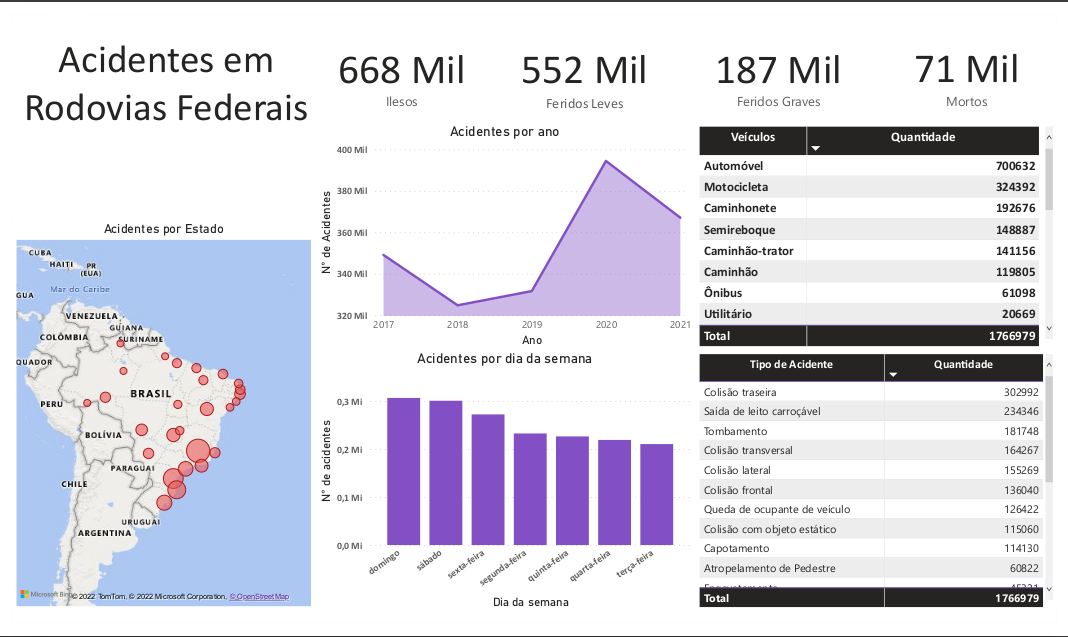